<a href="https://colab.research.google.com/github/shinchangyoung/python-algorithm-solutions/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%EC%9D%91%EC%9A%A9/2_1_1_%ED%8C%90%EB%8B%A4%EC%8A%A4%EC%99%80_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ※ 판다스와 넘파이 비교

|구분</span>|판다스|넘파이|
|---|---|---|
|**특징**|하나 이상의 자료형을 원소로 가질 수 있음|같은 자료형만 원소로 가질 수 있음|
||테이블 형식의 작업(SQL과 같은 쿼리나 조인)|행렬 및 벡터 연산 기반|
||2차원 이하 배열의 데이터|3차원 이상의 배열도 가능|
|**메모리**|상대적으로 더 많이 필요|상대적으로 더 조금 필요|
|**속도**|느림|빠름|
|**입출력**|SQL, 엑셀 파일, CSV 파일, DB에서 데이터를 읽고, 쓸 수 있음|npy, npz와 같은 확장자 혹은 텍스트 파일로 입출력 |

## 2.1 판다스

- 판다스는 데이터 프레임과 시리즈라는 두 가지 자료구조 제공
- 데이터프레임의 한 열만 떼어내면 시리즈가 됨


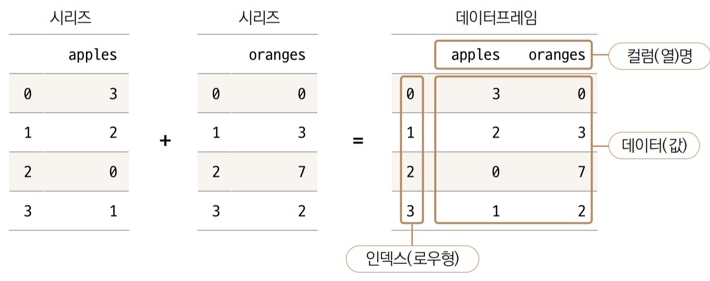

### 2.1.1 판다스로 csv 파일 불러오기

In [ ]:
import pandas as pd

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/sample.csv'

In [ ]:
sample = pd.read_csv(file_url)

In [ ]:
sample

### 2.1.2 데이터프레임을 살펴보는 다양한 함수

In [ ]:
sample.head()

In [ ]:
sample.head(3)

In [ ]:
sample.tail()

In [ ]:
sample.tail(10)

In [ ]:
sample.info()

### ※ 판다스에서 주로 볼 수 있는 자료형

|**자료형**|**설명**|
|---|---|
|**object**|'' 혹은 ""로 감싸진 텍스트와 같은 문자형태 또는 혼합형 데이터|
|**int64**|소수점이 없는 숫자|
|**float64**|소수점이 있는 숫자|
|**bool**|True/Flase 두 가지 형태의 값을 지닌 논리형|
|**datetime64**|날짜/시간을 다루는 자료형|
|**category**|한정된 고유값으로 구성된 범주형 데이터|

In [ ]:
sample.describe()

### 2.1.3 데이터프레임 직접 만들기

In [ ]:
sample_dic = {'name': ['John','Ann','Kevin'], 'age': [23,22,21]}

In [ ]:
pd.DataFrame(sample_dic)

In [ ]:
[[1,2],
 [3,4],
 [5,6],
 [7,8]]

In [ ]:
pd.DataFrame([[1,2],[3,4],[5,6],[7,8]])

In [ ]:
pd.DataFrame([[1,2],[3,4],[5,6],[7,8]], columns = ['var_1','var_2'], index=['a','b','c','d'])

### 2.1.4 데이터프레임 인덱싱

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/sample_df.csv'

In [ ]:
sample_df = pd.read_csv(file_url, index_col=0)

In [ ]:
sample_df

In [ ]:
sample_df['var_1']

In [ ]:
sample_df['var_1', 'var_2']       # [ ] 안에는 하나의 값만 들어갈 수 있음

In [ ]:
sample_df[['var_1', 'var_2']]   # [ [] ]를 사용하면 [] 가 하나의 값으로 인식됨

In [ ]:
# loc 는 location의 앞글자
sample_df.loc['a']           # 행 기준으로 인덱싱

In [ ]:
sample_df.loc[['a','b','c']]

In [ ]:
sample_df.loc['a':'c']

In [ ]:
# iloc: integer location의 약자
sample_df.iloc[[0,1,2]]

In [ ]:
sample_df.iloc[0:2]

In [ ]:
sample_df.iloc[0:3]

In [ ]:
sample_df.iloc[0:3, 2:4]      # 컬럼까지 동시에 인덱싱

In [ ]:
sample_df['var_1'].isin([4])

In [ ]:
sample_df.drop('var_1', axis=1)     # 컬럼을 제거하려면 axis = 1

- 축(axis) 이해하기
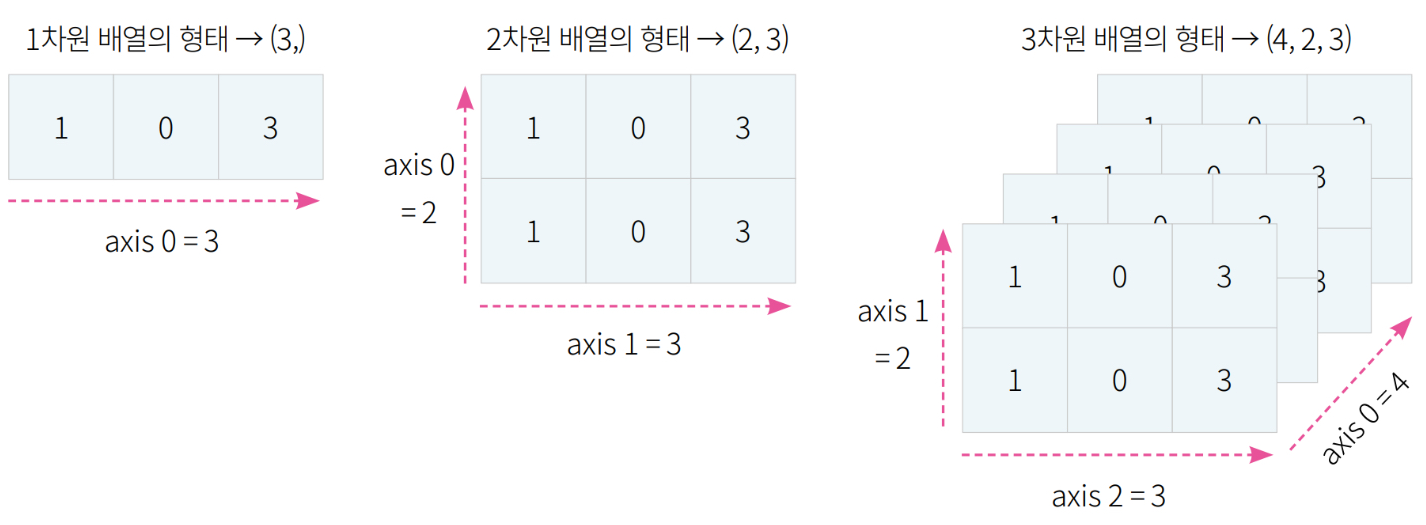

3차원은 numpy에서 다룸

In [ ]:
sample_df.drop(['var_1','var_2'], axis=1)

In [ ]:
sample_df.drop(['a','b','c'])         # 행을 제거하려면 axis = 0 또는 디폴트로 사용

## 2.1.5 데이터 필터링

- 비교 연산자 >로 필터링하기

In [ ]:
netflix = pd.read_csv('2.1.1.netflix.csv')
netflix['release_year'] > 2015

In [ ]:
more2015 = netflix[netflix['release_year'] > 2015]
more2015.head()

- 부정 연산자 ~로 필터링하기

In [ ]:
less2015 = netflix[~(netflix['release_year'] > 2015)]
less2015.head()

- 논리 연산자 &나 |로 필터링하기

In [ ]:
(netflix['release_year'] > 2015) & (netflix['type'] == 'TV Show')

In [ ]:
more2015_tv = netflix[(netflix['release_year'] > 2015) & (netflix['type'] == 'TV Show')]
more2015_tv.head()

In [ ]:
more2015_or_tv = netflix[(netflix['release_year'] > 2015) | (netflix['type'] == 'TV Show')]
more2015_or_tv.head()

### 데이터 필터링 응용 예제
- 이벤트 당첨자 필터링 하기
 1. 댓글 길이는 100자 이상이어야 합니다.
 2. 좋아요 수가 20개 이상이어야 합니다.
 3. 스팸 댓글이 아니어야 합니다.
 4. 이미지가 포함된 댓글이어야 합니다.



In [ ]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah'],
    'comment_length': [150, 200, 50, 300, 120, 180, 75, 160],
    'likes': [25, 30, 10, 45, 20, 35, 5, 28],
    'is_spam': [False, False, True, False, False, True, False, False],
    'has_image': [True, False, True, True, False, False, True, True]
}
df = pd.DataFrame(data)

In [ ]:
# 필터링 조건 설정
condition = (
  (df['comment_length'] >= 100) &       # 댓글 길이 100자 이상
  (df['likes'] >= 20) &                 # 좋아요 20개 이상
  (~df['is_spam']) &                    # 스팸 댓글이 아니어야 함
  (df['has_image'])                     # 이미지가 포함된 댓글이어야 함
)

# 조건을 만족하는 행들 필터링
winner_df = df[condition]
print(winner_df)

### 2.1.6 데이터프레임의 인덱스 변경

In [ ]:
sample_df.reset_index()

In [ ]:
sample_df.reset_index(drop=True)          # 기존 인덱스는 제거하기

In [ ]:
sample_df.set_index('var_1')

### 2.1.7 데이터프레임의 변수별 계산

In [ ]:
sample_df.sum()

In [ ]:
sample_df.aggregate(['sum','mean'])

### 2.1.8 그룹별 계산

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/iris.csv'
iris = pd.read_csv(file_url)

In [ ]:
iris.head()

In [ ]:
iris.groupby('class').mean()

In [ ]:
iris.groupby('class').agg(['count','mean'])

### 2.1.9 변수 내 고윳값 확인하기

In [ ]:
iris['class'].unique()

In [ ]:
iris['class'].nunique()

In [ ]:
iris['class'].value_counts()

## 2.1.10 특정 열 선택을 조건으로 활용하기

In [ ]:
# 예제 데이터 생성
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 30, 35, 28, 40],
    'salary': [70000.00, 80000.00, 90000.00, 60000.00, 95000.00]
}

# Dataframe 생성
df = pd.DataFrame(data)

In [ ]:
# 나이가 30 이상인 직원의 이름과 급여 반환
result = df[df['age'] >= 30][['name', 'salary']]
result

In [ ]:
# 예제 데이터 생성
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math': [88, 92, 85, 95, 90],
    'science': [80, 85, 88, 92, 85],
    'english': [90, 87, 85, 88, 92]
}

# Dataframe 생성
df = pd.DataFrame(data)

In [ ]:
# 개인별 과목 점수의 평균값 계산 (axis=1)
df['average'] = df[['math', 'science', 'english']].mean(axis=1)

# 이름과 평균값만을 포함하는 새로운 데이터프레임 생성
average_df = df[['name', 'average']]

average_df

## 2.2 넘파이

- 넘파이의 배열
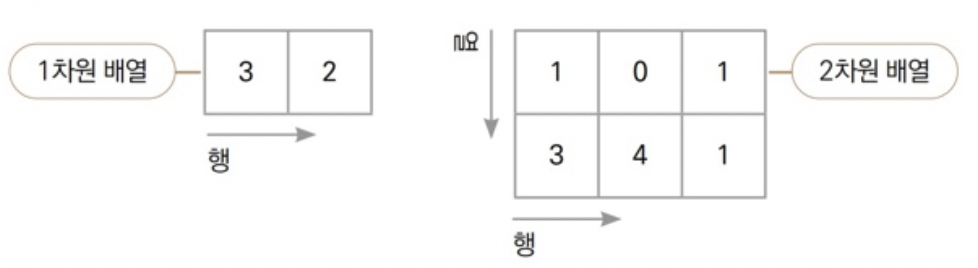

In [ ]:
import numpy as np

In [ ]:
np.array([1,2,3])

- 2차원 배열

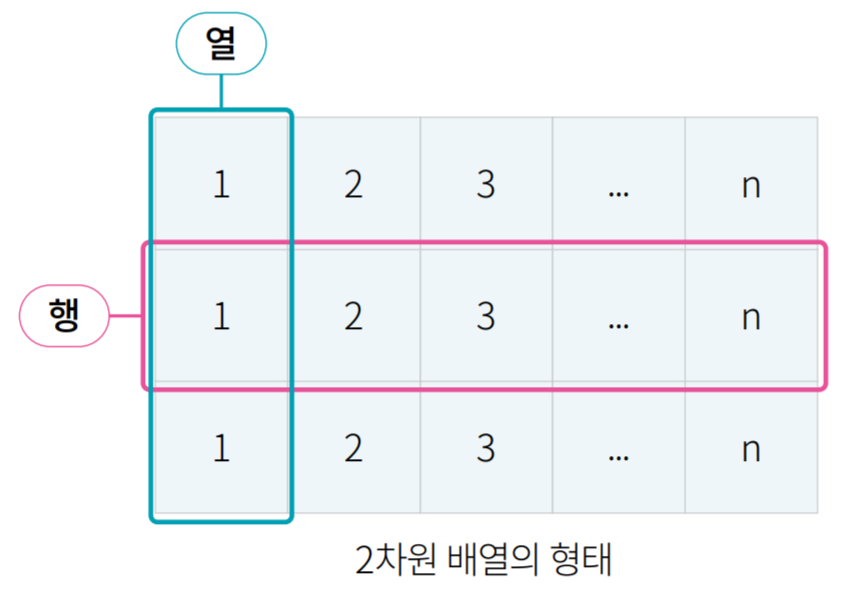

In [ ]:
np.array([[1,2,3],
          [4,5,6],
          [7,8,9]])

- 3차원 배열
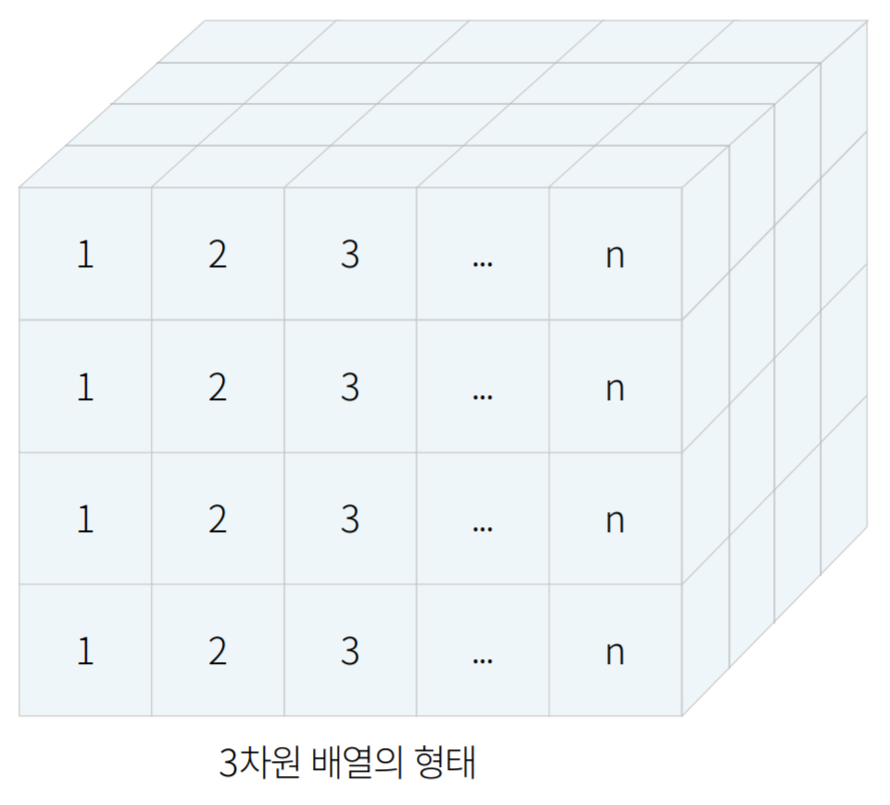

In [ ]:
np.array([[[1,2,3],
           [4,5,6],
           [7,8,9]],
          [[1,2,3],
           [4,5,6],
           [7,8,9]],
          [[1,2,3],
           [4,5,6],
           [7,8,9]]])

### 2.2.1 배열 생성

In [ ]:
np.array([1,2,3,4,5])

In [ ]:
np.array(sample_df)

In [ ]:
sample_np = np.array(sample_df)
pd.DataFrame(sample_np)             # 컬럼명이 0, 1, 2, 3, 4

In [ ]:
sample_df.columns             # 기존 프레임워크에서 컬럼명 가져오기

In [ ]:
pd.DataFrame(sample_np, columns = sample_df.columns)      # 새 프레임워크에 컬럼명 붙이기

### 2.2.2 배열 탐색(인덱싱)

In [ ]:
sample_np

In [ ]:
sample_np[0]

In [ ]:
sample_np[0,2]

In [ ]:
sample_np[0:3,2:4]

In [ ]:
sample_np[:,2]

### 2.2.3 배열의 연산

In [ ]:
np_a = np.array([[1,3], [0,-2]])

In [ ]:
np_a

In [ ]:
np_a + 10

In [ ]:
np_a - 5

In [ ]:
np_a * 2

In [ ]:
np_a+10 / 3

In [ ]:
np_b = np.array([[1,0], [0,1]])
np_b

In [ ]:
np_a + np_b

In [ ]:
np_a - np_b

In [ ]:
np_a * np_b

- 수학에서의 행렬 곱샘을 하려면?
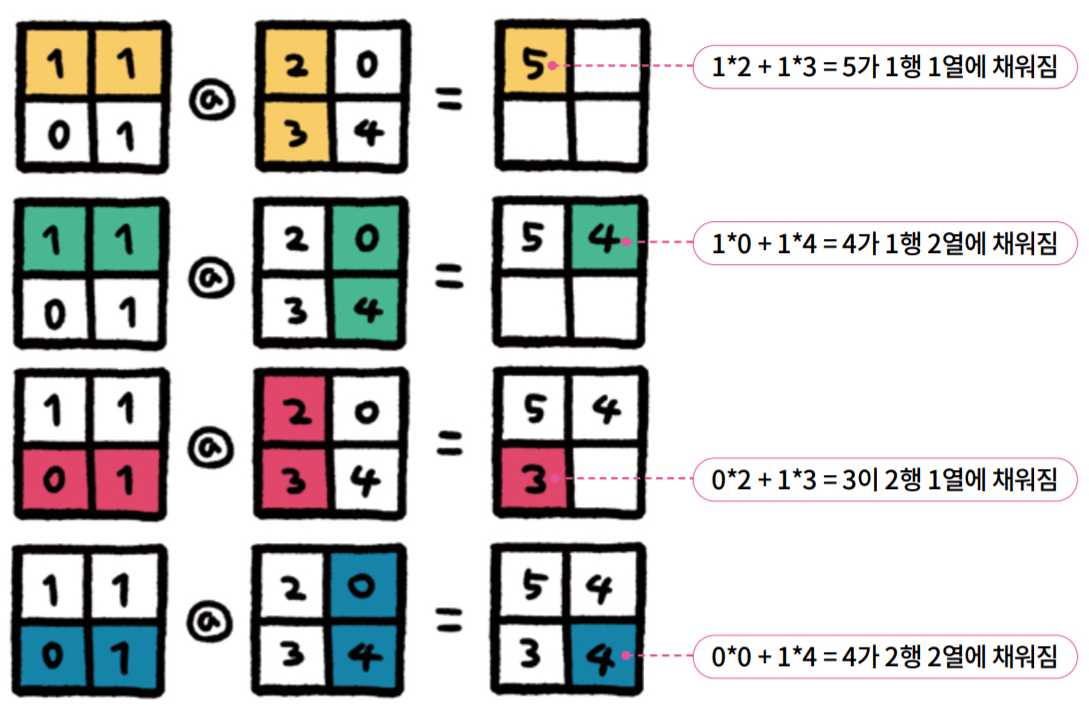

In [ ]:
np_a @ np_b

### 2.2.4 임의의 숫자를 뽑는 random.XXX() 함수

In [ ]:
np.random.randint(11)

In [ ]:
np.random.randint(50, 71)

In [ ]:
np.random.randint(50, 71, 5)

In [ ]:
np.random.choice(['red', 'green','white','black','blue'],size=3)

In [ ]:
np.random.choice(['red', 'green','white','black','blue'],size=3, replace=False)

### 2.2.5 그외 유용한 함수

In [ ]:
np.arange(1,11)

In [ ]:
np.arange(1,11,2)

In [ ]:
np.linspace(1,10,4)       # 1부터 10까지 균등한 간격의 값을 4개 추출

## 2.2.6 수학 함수, 집계 함수

In [ ]:
A = np.array([4, 16, 25])
np.sqrt(A)

In [ ]:
# 0부터 8 미만까지 출력하고 (2, 4) 크기로 재가공 후, 제곱하여 출력
a = np.arange(8).reshape(2, 4) ** 2
a

- 배열의 형태 변환하기
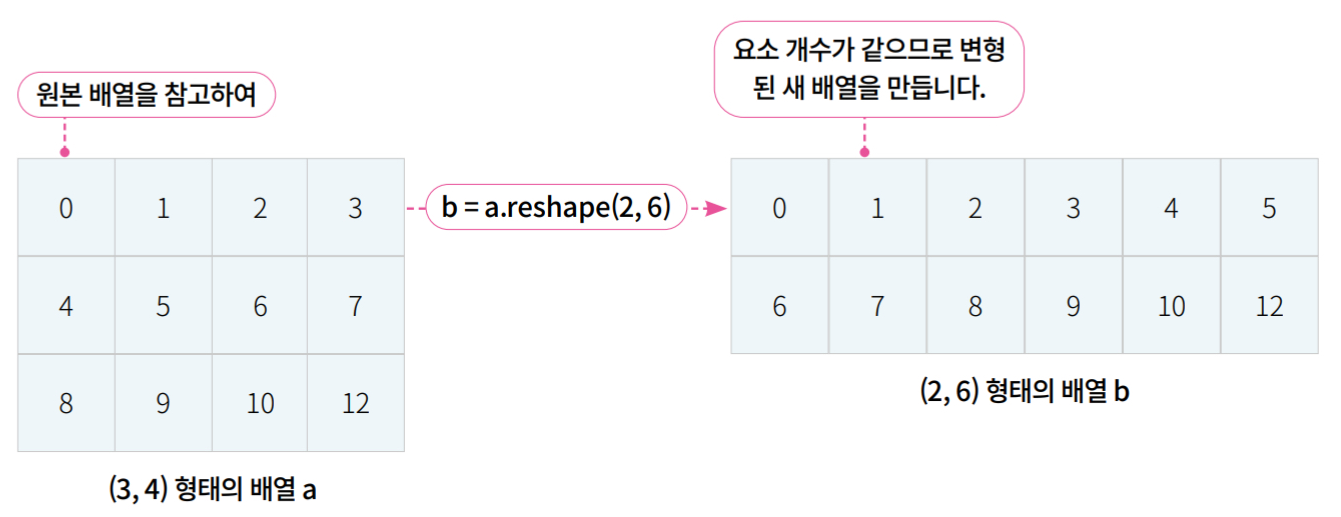

- 1차원 배열로 변환하기
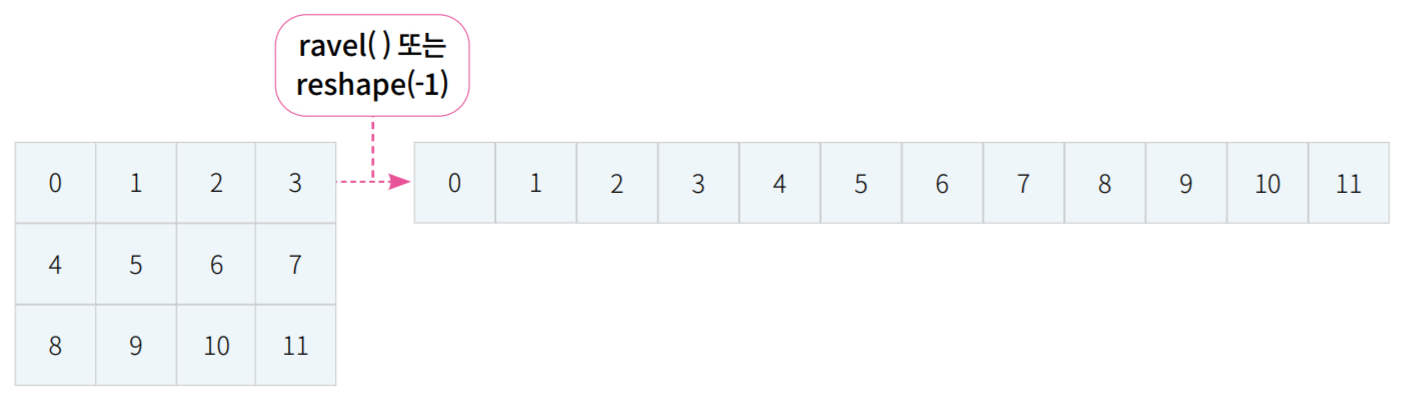

- -1은 자동 변환이라는 의미가 담겨 있음
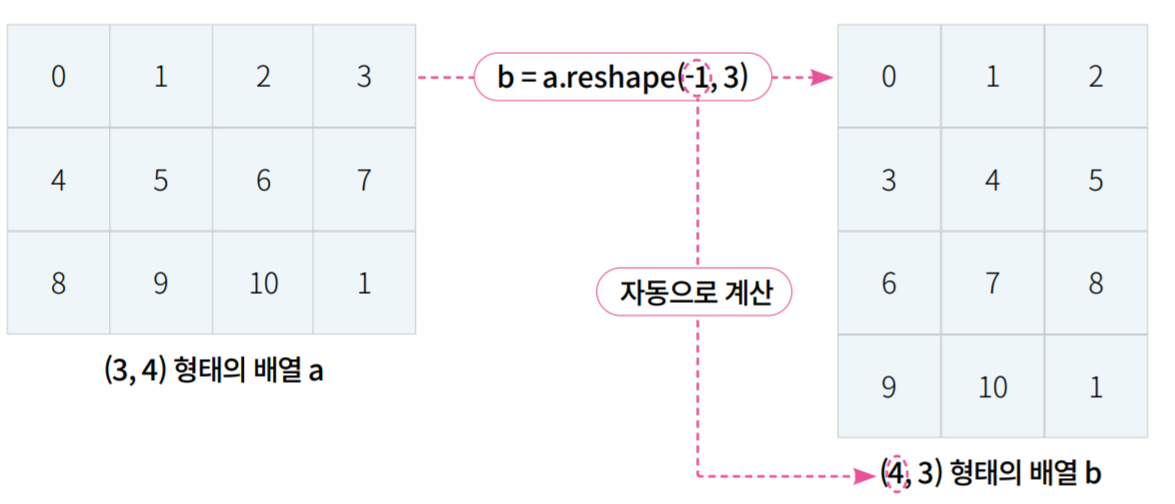

In [ ]:
a.sum()     # 모든 요소의 합

In [ ]:
a.mean()    # 모든 요소의 평균

In [ ]:
a.mean(axis = 0)    # 열을 기준으로 연산

In [ ]:
print(a.min())    # 모든 요소 중 최솟값
print(a.max())    # 모든 요소 중 최댓값

In [ ]:
a.max(axis=1)

In [ ]:
a.cumsum()        # 모든 요소의 누적합

In [ ]:
a.argmax()        # 모든 요소 중 최댓값의 인덱스